## Trabalho de Conclusão de Curso - MBA Data Science & Analytics - Evien Oliveira

* Projeto Final: Predição de custo de sinistros de saúde via Machine Learning.
* Base de dados: "Health insurance data set" (https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set)
* Período de avaliação: Data da extração: 03/12/2023
* Objetivo final: A sinistralidade de contratos de saúde é uma preocupção para grandes empresas que lidam com a saúde de seus colaboradores. Isso tem impacto também na receita das corretoras que são contratadas justamente para auxiliar na escolha da melhor oferta. O objetivo deste projeto é portanto, prever os custos de sinistro com base no histórico médico das vidas de um determinado contrato para auxiliar as negociações deste mercado.

## Exploração dos dados

O primeiro passo de qualquer modelagem consiste na exploração dos dados para entender os atributos e o tipo de informação que cada um reproduz. Nesta sessão, é feita a leitura do arquivo csv, a visualização de uma amostra e por fim, a categorização das mesmas.

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd

In [ ]:
# Obtenção dos dados (arquivo csv originário do Kaggle)
dados = pd.read_csv("1651277648862_healthinsurance.csv",sep = ',')

#amostra das 10 primeiras linhas da base de dados
display(dados.head(n=10))

**Descrição dos dados**

A base possui 13 colunas, com as seguines características:

* age : Idade do titular (Numerica)
* sex: Gênero do titular (Categorica)
* weight: Peso do titular (Numerica)
* bmi: imc - indice de massa corporal - kg/m^2 (Numerica)
* no_of_dependents: Número de dependentes do titular (Numerica)
* smoker: Indica se o titular é fumante ou não, sendo não fumante = 0 e fumante = 1 (Categorica)
* claim: O valor de sinistro total de cada titular da apólice (Numerica)
* bloodpressure: Leitura da pressão sanguínea do titular (Numerica)
* diabetes: Indica se o titular sofre de diabetes ou não, sendo não diabético = 0 e diabetico = 1 (Categorica)
* regular_ex: O titular se exercita regularmente ou não, sendo sedentário = 0 e ativo = 1 (Categorica)
* job_title: profissão do titular (Categorica)
* city: Cidade em que o titular reside (Categorica)
* hereditary_diseases: O titular sofre de uma doença hereditária ou não (Categorica)

## REGRESSÃO

## Tratamento dos dados

As ferramentas de aprendizagem de máquina funcionam melhor com bases consistentes, de preferência sem valores nulos. 
Além disso, os algoritmos escolhidos para este projeto exigem que os dados de entrada sejam numéricos. 

Por esse motivo o tratamento de dados consiste na eliminação de campos nulos e dummerização de atributos categóricos.

In [ ]:
#Mapeamento de campos nulos
dados.isnull().sum()

Como a base de dados possui apenas 15 mil linhas, é preferível preencher os vazios com a média ao invés de eliminar este volume de de dados (956 para bmi e 396 para age). 

In [ ]:
from sklearn.impute import SimpleImputer

# preenchendo valores nulos com a media dos dados
imputer = SimpleImputer(strategy='mean')
contem_nulos = ['age', 'bmi']
dados[contem_nulos] = imputer.fit_transform(dados[contem_nulos])

#nova checagem de nulos
dados.isnull().sum()

As quatro variáveis categóricas ("sex","hereditary_diseases","city","job_title") precisam ser dummerizadas antes de criar um modelo de predição.

In [ ]:
#sexo
dados['sex']=dados['sex'].map({'female':0,'male':1})

#doenças
dados["hereditary_diseases"]=dados["hereditary_diseases"].map({'NoDisease':0, 'Epilepsy':1, 'EyeDisease':2, 'Alzheimer':3, 'Arthritis':4,
       'HeartDisease':5, 'Diabetes':6, 'Cancer':7, 'High BP':8, 'Obesity':9})

# codificador de rótulos para os outros dois atributos que possuem muitos dados variados
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#cidades
dados['city'] = label_encoder.fit_transform(dados['city'])

#profissões
dados['job_title'] = label_encoder.fit_transform(dados['job_title'])


Abaixo, os atributos categóricos após a codificação de rótulos. 

In [ ]:
print('sex: '+str(dados['sex'].unique())+'\n')
print('hereditary_diseases: '+str(dados['hereditary_diseases'].unique())+'\n')
print('city: '+str(dados['city'].unique())+'\n')
print('job_title: '+str(dados['job_title'].unique()))

## Diagnóstico de Correlação

Com a finalidade de entender a relação entre as variáveis, é feita a matriz de correlação. Quanto mais próximo de 1 for o coeficiente de correlação, mais forte a relação entre as variáveis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

matriz = dados.corr()

# Criação da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de Correlação')
plt.show()

Nota-se que o tabagismo, doenças hereditárias e idade estão altamente relacionadas ao valor do sinistro.

## Teste de algoritimos

In [ ]:
# definicao de variaveis e alvo

x=dados.drop(['claim'],axis=1)
y=dados['claim']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train[0]

In [ ]:
# Importação de 4 algoritimos de machine learning da biblioteca scikit-learn (Sklearn)
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR  
from sklearn.ensemble import GradientBoostingRegressor  

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)


In [ ]:
#comparar predições

#LR
y_pred1 = lr.predict(X_test)

#SVR
y_pred2 = svm.predict(X_test)

#RF
y_pred3 = rf.predict(X_test)

#GR
y_pred4 = gr.predict(X_test)

# Tabela para visualizar as predições
df1 = pd.DataFrame({'Real': y_test, 'LR': y_pred1, 'SVR': y_pred2, 'RF': y_pred3, 'GR': y_pred4})
df1

In [ ]:
#Exportação dos dados para gerar gráficos em excel
df1.to_csv('meu_dataframe.csv', index=False)

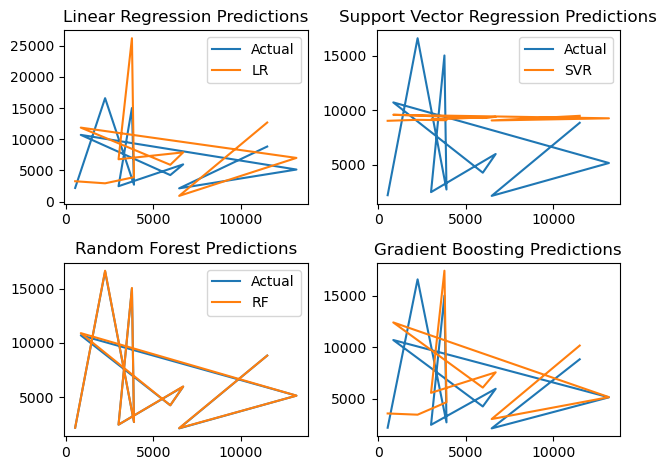

In [77]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Real')
plt.plot(df1['LR'].iloc[0:11], label="LR")
plt.legend()
plt.title('Linear Regression Predictions')

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Real')
plt.plot(df1['SVR'].iloc[0:11], label="SVR")
plt.legend()
plt.title('Support Vector Regression Predictions')

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Real')
plt.plot(df1['RF'].iloc[0:11], label="RF")
plt.legend()
plt.title('Random Forest Predictions')

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Real')
plt.plot(df1['GR'].iloc[0:11], label="GR")
plt.title('Gradient Boosting Predictions')

plt.tight_layout()
plt.show()

## Análise de qualidade

Nota-se o regressor random forest apresenta maior acurácia.

In [78]:
#Calculo de R quadrado (R2) para cada modelo

from sklearn import metrics

lr_r2_score = metrics.r2_score(y_test, y_pred1)
print('LR: '+str(lr_r2_score))

svm_r2_score = metrics.r2_score(y_test, y_pred2)
print('SMV: '+str(svm_r2_score))

rf_r2_score = metrics.r2_score(y_test, y_pred3)
print('RF: '+str(rf_r2_score))

gr_r2_score = metrics.r2_score(y_test, y_pred4)
print('GR: '+str(gr_r2_score))



LR: 0.7490864602549504
SMV: -0.10367227528667633
RF: 0.9675940266493739
GR: 0.8629629748296114


O algoritmo Random Forest Regressor (RF) apresentou o maior R² (0.9664),  mostrando ser o moledo mais efetivo na predição de sinistros.

In [79]:
#Calculo de erro médio absoluto (MAE) para cada modelo

mae_lr = metrics.mean_absolute_error(y_test, y_pred1)
print('LR: '+str(mae_lr))

mae_svr = metrics.mean_absolute_error(y_test, y_pred2)
print('SVR: '+str(mae_svr))

mae_rf = metrics.mean_absolute_error(y_test, y_pred3)
print('RF: '+str(mae_rf))

mae_gr = metrics.mean_absolute_error(y_test, y_pred4)
print('GR: '+str(mae_gr))


LR: 4071.725236568481
SVR: 8291.201612038634
RF: 441.4760900000087
GR: 2667.9201166336647


Novamente, o regressor Random Forest (RF) obteve a melhor performace, com o menor erro médio absoluto (441.47) 

## CLASSIFICAÇÃO

## Tratamento

Afim de testar uma previsão dicotômica e utilizar outros modelos do Sklearning, será criada uma outra coluna com base nos sinistros, classificando-os como de alto custo (acima do percentil de 90%) e os demais (abaixo deste percentil). Desta forma, essa métrica terá o valor número igual a 1 quando for de alto custo, e igual a 0 caso contrário.

In [121]:
#Calculo do Percentil de 90% do valor total de sinistros (claim)
percentil90 = np.percentile(dados['claim'],90)

# Número de indivíduos acima do percentil de 90%
maiores_usuarios = len(dados[dados['claim']>percentil90].index)

print(str(maiores_usuarios)+' usuários somam sinistros acima de '+'$'+str(percentil90))


1486 usuários somam sinistros acima de $35160.1


In [122]:
#inserindo a coluna de H_COST (indicador de custos médicos superiores ao percentil de 95%)
dados['alto_custo'] = np.where(dados['claim']>=percentil90, 1,0)
dados['faixa_etaria'] = np.where(dados['claim']>=percentil90, 1,0)

print(dados.head(10))

    age  sex  weight        bmi  hereditary_diseases  no_of_dependents  \
0  60.0    1      64  24.300000                    0                 1   
1  49.0    0      75  22.600000                    0                 1   
2  32.0    0      64  17.800000                    1                 2   
3  61.0    0      53  36.400000                    0                 1   
4  19.0    0      50  20.600000                    0                 0   
5  42.0    0      89  37.900000                    0                 0   
6  18.0    1      59  23.800000                    0                 0   
7  21.0    1      52  26.800000                    0                 0   
8  63.0    1      55  30.266413                    0                 0   
9  40.0    0      69  29.600000                    0                 0   

   smoker  city  bloodpressure  diabetes  regular_ex  job_title    claim  \
0       0    55             72         0           0          2  13112.6   
1       0     5             78   

In [185]:
#exportação dos dados para gerar gráficos em excel
import pandas as pd
dfi = pd.DataFrame(dados)
dfi.to_csv('dados.csv', index=False)

## Diagnóstico

Algumas variaveis categóricas possuem menos variações, então é possível visualizar graficamente o comportamento do sinistro para estes casos e chegar a algumas conclusões.

Text(0.5, 1.0, 'Gráfico 01 - Sinistro x Exercícios')

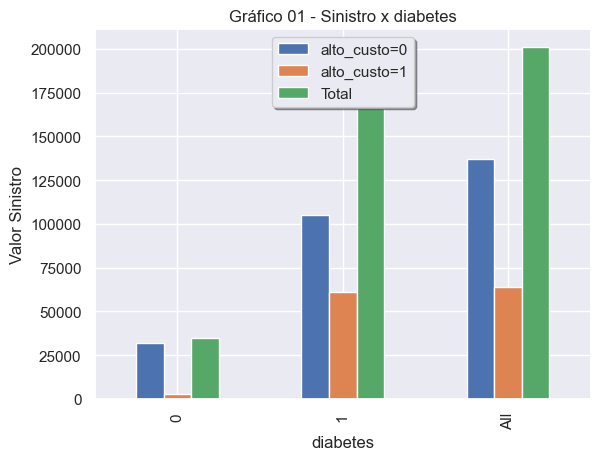

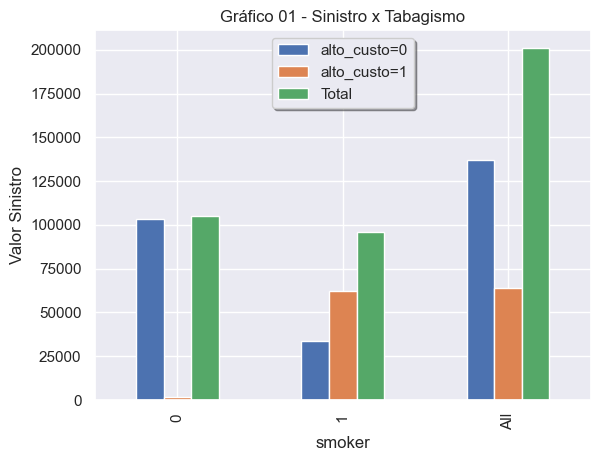

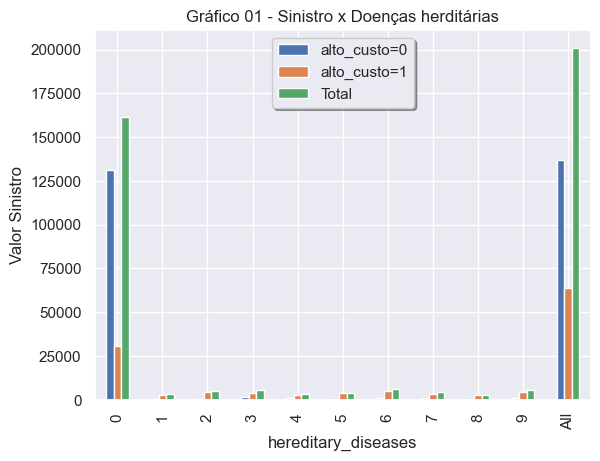

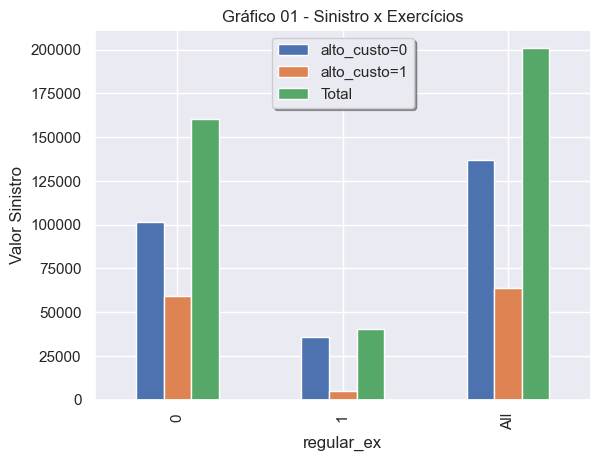

In [130]:
#Visualização dos dados
sns.set()  
graf01=dados.pivot_table('claim', index='diabetes', columns='alto_custo', aggfunc=[lambda x: x.sum()/1000], margins=True).plot(kind= 'bar')
plt.legend(('alto_custo=0', 'alto_custo=1', 'Total'), loc='upper center', shadow=True)
plt.ylabel("Valor Sinistro")
plt.title ("Gráfico 01 - Sinistro x diabetes")

graf02=dados.pivot_table('claim', index='smoker', columns='alto_custo', aggfunc=[lambda x: x.sum()/1000], margins=True).plot(kind= 'bar')
plt.legend(('alto_custo=0', 'alto_custo=1', 'Total'), loc='upper center', shadow=True)
plt.ylabel("Valor Sinistro")
plt.title ("Gráfico 01 - Sinistro x Tabagismo")

graf03=dados.pivot_table('claim', index='hereditary_diseases', columns='alto_custo', aggfunc=[lambda x: x.sum()/1000], margins=True).plot(kind= 'bar')
plt.legend(('alto_custo=0', 'alto_custo=1', 'Total'), loc='upper center', shadow=True)
plt.ylabel("Valor Sinistro")
plt.title ("Gráfico 01 - Sinistro x Doenças herditárias")

graf04=dados.pivot_table('claim', index='regular_ex', columns='alto_custo', aggfunc=[lambda x: x.sum()/1000], margins=True).plot(kind= 'bar')
plt.legend(('alto_custo=0', 'alto_custo=1', 'Total'), loc='upper center', shadow=True)
plt.ylabel("Valor Sinistro")
plt.title ("Gráfico 01 - Sinistro x Exercícios")


Os gráficos acima não trouxeram grandes surpresas, mas ajudaram a validar a consistencia dos dados. Conforme esperado, a ocorrencia de altos custos é maior para sedentários, fumantes e diabéticos. Curiosamente, doenças hereditárias parecem não ter relação com o valor do sinistro, visto que está concentrado nos casos sem doença hereditária.


In [133]:
# Divisão dos dados entre atributos e coluna alvo (alto_custo)
alto_custo_raw = dados['alto_custo']
atributos_raw = dados.drop('alto_custo', axis = 1)

In [136]:
# Aplicação da transformação de log:
skewed = ['bloodpressure', 'weight', 'bmi']

features_log_transformed = pd.DataFrame(data = atributos_raw)
features_log_transformed[skewed] = atributos_raw[skewed].apply(lambda x: np.log(x + 1))


In [138]:
# Importação do sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicialização do aplicador de escala e aplicação aos atributos
scaler = MinMaxScaler() 
numerical = ['age','bloodpressure', 'weight', 'bmi']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

#Exclusão da variável claim que deixou de ser a variável alvo:
features_log_minmax_transform = features_log_minmax_transform.drop(['claim'], axis = 1)

# Exibição dos 10 primeiros registros com a escala aplicada
display(features_log_minmax_transform.head(n=10))

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,0.913043,1,0.613517,0.343455,0,1,0,55,0.891583,0,0,2
1,0.673913,0,0.768469,0.283369,0,1,0,5,0.907997,1,1,16
2,0.304348,0,0.613517,0.086940,1,2,1,63,0.932765,1,1,0
3,0.934783,0,0.429768,0.681102,0,1,1,64,0.891583,1,0,10
4,0.021739,0,0.373119,0.206873,0,0,0,8,0.918261,1,0,22
5,0.521739,0,0.936037,0.715071,0,0,0,1,0.907997,0,0,12
6,0.000000,1,0.534189,0.326212,0,0,0,65,0.867462,0,0,32
7,0.065217,1,0.411243,0.424856,0,0,0,9,0.897199,1,0,2
8,0.978261,1,0.465811,0.526365,0,0,0,29,0.885810,1,0,12
9,0.478261,0,0.686964,0.507754,0,0,0,79,0.867462,1,1,13


In [141]:
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode da coluna 'alto_custo_raw' para valores numéricos
alto_custo = alto_custo_raw.apply(lambda x: 0 if x==0 else 1)

# Número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print ("{} total de atributos após aplicar o one-hot encoding.".format(len(encoded)))

print (encoded)

12 total de atributos após aplicar o one-hot encoding.
['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title']


In [143]:
from sklearn.model_selection import train_test_split

# Divisão dos atributos e 'alto_custo' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    alto_custo_raw, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Mostrando os resultados da divisão dos dados
print ("Conjunto de Treinamento possui {:0,} amostras.".format(X_train.shape[0]))
print ("Conjunto de Testes possui {:0,} amostras.".format(X_test.shape[0]))

Conjunto de Treinamento possui 10,500 amostras.
Conjunto de Testes possui 4,500 amostras.


## Implementação

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Inicializando os três modelos
GNB = GaussianNB()
DTC = DecisionTreeClassifier(random_state=100)
LR = LogisticRegression(random_state=100)

In [158]:
#Importação do fbeta_score e accuracy_score do sklearn.metrics

from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict (learner, sample_size, X_train, y_train, X_test, y_test): 
   
    results = {}
    
    start = time() 
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() 
    
    #Calculando o tempo de treinamento
    results['train_time'] = end - start
        
    # Predições do set de treinamento (X_test)
    # Predições das primeiros 300 amostras de treinamento 
    start = time() 
    predictions_test = learner.predict (X_test)
    predictions_train = learner.predict (X_train[:300])
    end = time() 
    
    # Cálculo do tempo total de predição
    results['pred_time'] = end - start
            
    # Cálculo do accuracy das primeiros 300 amostras de treinamento y_train[:300]
    results['acc_train'] = accuracy_score (y_true=y_train[:300],y_pred=predictions_train)
        
    # Cálculo do accuracy no set de testes 
    results['acc_test'] = accuracy_score (y_true=y_test,y_pred=predictions_test)
    
    # Cálculo do F-score das primeiros 300 amostras de treinamento usando fbeta_score()
    results['f_train'] = fbeta_score (y_true=y_train[:300],y_pred=predictions_train,beta=0.5)
        
    # Cálculo do F-score no set de testes y_test
    results['f_test'] = fbeta_score (y_true=y_test,y_pred=predictions_test,beta=0.5)
       
    # Print dos Resultados
    print ("{} treinado em {} amostras.".format(learner.__class__.__name__, sample_size))
    
    print(results)
    
    # Resultados
    return results    

In [159]:
# Importação dos 3 modelos de aprendizado supervisionado da sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Coletando os resultados dos algoritmos de aprendizado
results = {}
for clf in [GNB, DTC, LR]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    train_predict(clf, len(X_train), X_train, y_train, X_test, y_test)

GaussianNB treinado em 10500 amostras.
{'train_time': 0.011517524719238281, 'pred_time': 0.008620023727416992, 'acc_train': 0.9433333333333334, 'acc_test': 0.9426666666666667, 'f_train': 0.7253886010362695, 'f_test': 0.7015810276679841}
DecisionTreeClassifier treinado em 10500 amostras.
{'train_time': 0.01897573471069336, 'pred_time': 0.016253948211669922, 'acc_train': 1.0, 'acc_test': 0.9928888888888889, 'f_train': 1.0, 'f_test': 0.9612141652613827}
LogisticRegression treinado em 10500 amostras.
{'train_time': 0.14490604400634766, 'pred_time': 0.015619993209838867, 'acc_train': 0.9733333333333334, 'acc_test': 0.9722222222222222, 'f_train': 0.8787878787878788, 'f_test': 0.8925189393939396}


C:\Users\evien\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
results = {}

start = time() 
GNB= GNB.fit(X_train,y_train)
end = time() 

#Calculando o tempo de treinamento
results['train_time'] = end - start

# Predições do set de treinamento (X_test)
# Predições das primeiros 300 amostras de treinamento 
start = time() 
predictions_test = GNB.predict (X_test)
predictions_train = GNB.predict (X_train[:300])
end = time() 

# Cálculo do tempo total de predição
results['pred_time'] = end - start

# Cálculo do accuracy das primeiros 300 amostras de treinamento y_train[:300]
results['acc_train'] = accuracy_score (y_true=y_train[:300],y_pred=predictions_train)

# Cálculo do accuracy no set de testes 
results['acc_test'] = accuracy_score (y_true=y_test,y_pred=predictions_test)

# Cálculo do F-score das primeiros 300 amostras de treinamento usando fbeta_score()
results['f_train'] = fbeta_score (y_true=y_train[:300],y_pred=predictions_train,beta=0.5)

# Cálculo do F-score no set de testes y_test
results['f_test'] = fbeta_score (y_true=y_test,y_pred=predictions_test,beta=0.5)
   
print ("ok")


ok


## Análise de qualidade

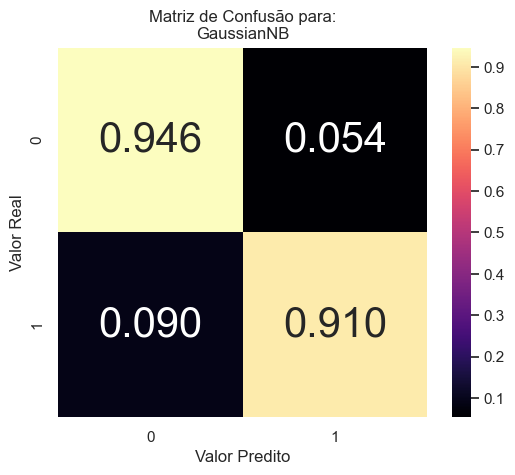

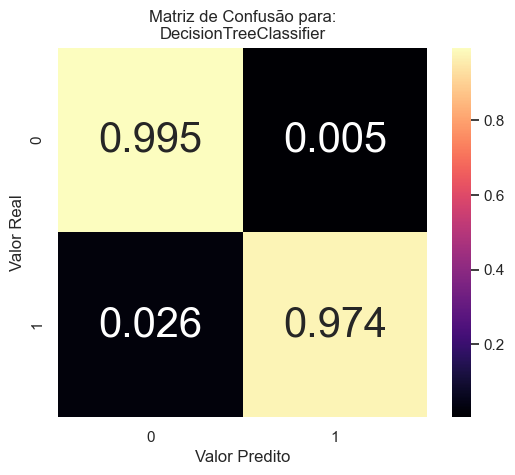

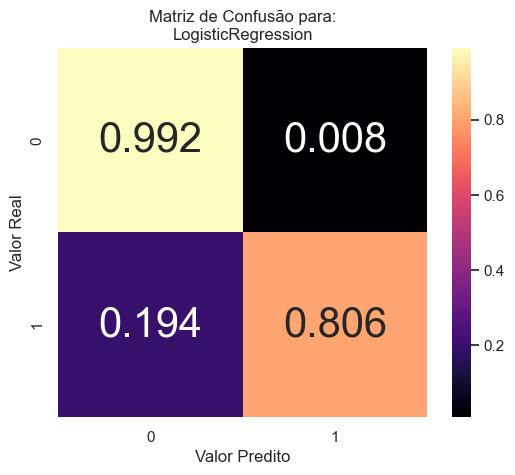

In [181]:
#Visualização da matriz de confusão para cada modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

for i,model in enumerate([GNB, DTC, LR]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

    # Colocando em formato de heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='magma', square=True, fmt='.3f')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predito')
    plt.title('Matriz de Confusão para:\n{}'.format(model.__class__.__name__))